In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mylibrary.nnlib as tnn
import matplotlib
import splinelib as tsp

(800, 2) (800,)


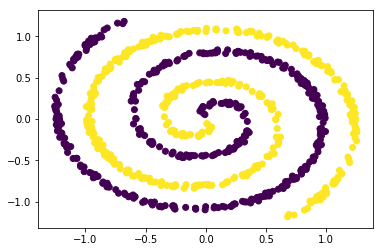

In [2]:
def twospirals(n_points, noise=.5):
    """
     Returns the two spirals dataset.
    """
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

x, y = twospirals(400)
x, y = x/10, y.reshape(-1)
print(x.shape, y.shape)
%matplotlib inline
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1))

In [3]:
colors = ['r', 'y', 'g', 'b']

### Building model 2-->2-->1 ;2 spline units added together

In [30]:
init_points = 10
max_points = 10
lr=0.1

layer1 = tsp.SplineMatrixLayer(2, 2, max_points=init_points)
layer2 = tsp.SplineMatrixLayer(2, 1, max_points=init_points)
sigmoid = tnn.Sigmoid()
# sigmoid = tnn.Linear()


layer1._increase_pieces_(increase_by = max_points-init_points)
layer2._increase_pieces_(increase_by = max_points-init_points)

loss_func = tnn.CrossEntropyBinary()
# dir(layer1)

In [31]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    a1 = layer1.forward(x)
    a2 = layer2.forward(a1)
    yout = sigmoid.forward(a2)
    dy = loss_func.del_loss(yout, y)
    
    da2 = sigmoid.backward(dy)
    da1 = layer2.backward(da2)
    dx = layer1.backward(da1)

    layer1.update(lr)
    layer2.update(lr)
    
    if step % 100 == 0:
        layer1._maintain_good_spline_()
        layer2._maintain_good_spline_()
            
    if step % 100 == 0:
            
        error = loss_func.loss(yout, y)
        print('_______________________')
        print("Steps", step)
        print("Error", error)
        
        ax.clear()
        out = (yout>0.5).astype(int)
        plt.scatter(x[:,0], x[:, 1], c=yout.reshape(-1))
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

_______________________
Steps 0
Error 591.118963756629


_______________________
Steps 100
Error 648.1239969167705


_______________________
Steps 200
Error 774.4957702275989


_______________________
Steps 300
Error 862.191719234749


_______________________
Steps 400
Error 936.0009685563257


_______________________
Steps 500
Error 992.5025267666575


_______________________
Steps 600
Error 1041.6406811653696


_______________________
Steps 700
Error 1068.0100075375842


_______________________
Steps 800
Error 1098.0140322496027


_______________________
Steps 900
Error 1124.2199043825258


_______________________
Steps 1000
Error 1140.6740837167692


_______________________
Steps 1100
Error 1154.7587231647265


_______________________
Steps 1200
Error 1169.9972567875054


_______________________
Steps 1300
Error 1174.325589861246


_______________________
Steps 1400
Error 1199.479055266705


_______________________
Steps 1500
Error 1206.711300535569


_______________________
Steps 1

TclError: invalid command name "pyimage216"

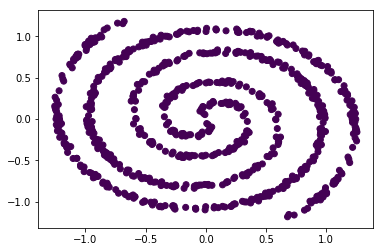

In [23]:
%matplotlib inline
a1 = layer1.forward(x)
a2 = layer2.forward(a1)
yout = sigmoid.forward(a2)
out = (yout>0.5).astype(int)

plt.scatter(x[:,0], x[:, 1], c=out.reshape(-1))

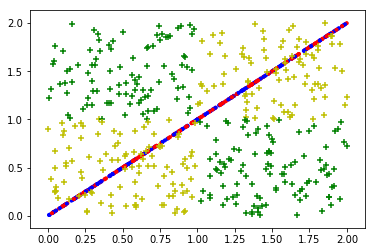

In [9]:
plt.scatter(x[:,0], x1, marker='.',c=y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(x[:,1], x1, marker='+',c=y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors[1:-1]))

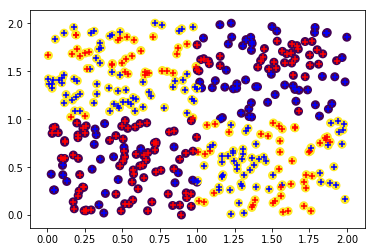

In [10]:
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), lw=3)
plt.scatter(x[:,0], x[:, 1], c=out.reshape(-1), marker='+', cmap=matplotlib.colors.ListedColormap(colors))

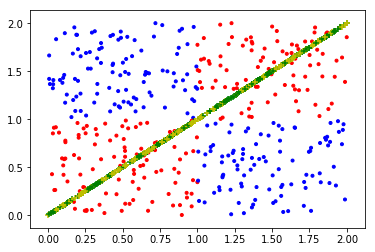

In [11]:
plt.scatter(x[:,0], x2, marker='.',c=y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(x[:,1], x2, marker='+',c=y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors[1:-1]))

In [12]:
h = 0.01
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), h), np.arange(x[:,1].min(), x[:,1].max(), h))
xxyy = np.c_[xx.ravel(), yy.ravel()]

x_ = xxyy
x1, x2 = x_[:, 0], x_[:, 1]
Y1 = spline1.forward(x1)
Y2 = spline2.forward(x2)
Y = sigmoid.forward(Y1+Y2)
out = (Y>0.5).astype(int)

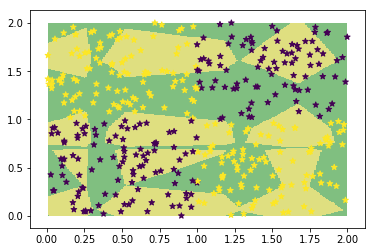

In [13]:
plt.imshow(out.reshape(xx.shape), interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=matplotlib.colors.ListedColormap(colors[1:-1]),
           alpha=0.5,
           aspect='auto', origin='lower')

plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), marker='*')